In [3]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import functions
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.image as mpimg

In [46]:
# IMPORT REPORTING DATA
df_reporting = pd.read_csv('data/SB-County-County Public reporting 2020-01-01_2024-12-31.csv')
# print(df_reporting.head())

In [23]:
# IMPORT PORTFOLIO DATA
df_portfolio = pd.read_csv('data/SB-County-County-Public-Portfolio-stations-report-01_01_20-12_31_24.csv', low_memory=False)
# print(df_portfolio.head())
print(f"The dataframe has {df_portfolio.shape[0]} and {df_portfolio.shape[1]} columns")

The dataframe has 88919 and 30 columns


## Data Analysis

### Santa Barbara County Reporting Data

In [26]:
print(f"The dataframe has {df_reporting.shape[0]} and {df_reporting.shape[1]} columns")

The dataframe has 1827 and 22 columns


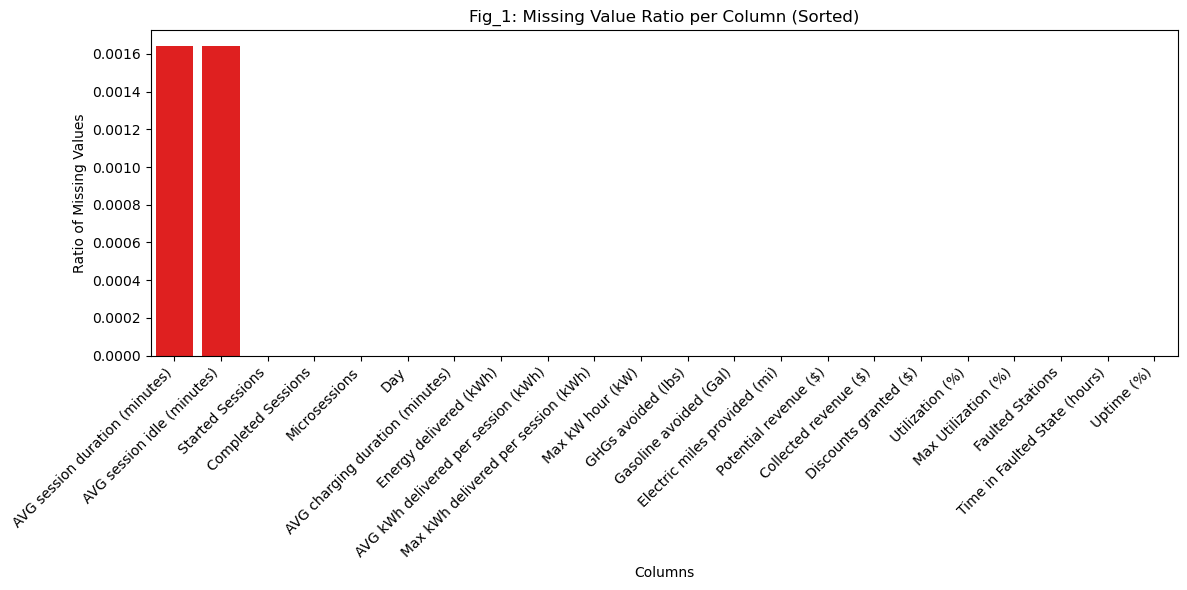

In [28]:
# Gets the mean of missing values in each column. Since True = 1 and False = 0 the mean tells us how much of the data is missing.
df_reporting_w_missing_values = df_reporting.isnull().mean().sort_values(ascending=False)

# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = sns.barplot(x=df_reporting_w_missing_values.index, y=df_reporting_w_missing_values.values, color='red')

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Ratio of Missing Values')
plt.title('Fig_1: Missing Value Ratio per Column (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('images/fig1.jpg')

# Show the plot
plt.show()

In [41]:
# Basic Statistical Analysis
df_reporting.describe()

,Started Sessions,Completed Sessions,Microsessions,AVG session duration (minutes),AVG charging duration (minutes),AVG session idle (minutes),Energy delivered (kWh),AVG kWh delivered per session (kWh),Max kWh delivered per session (kWh),GHGs avoided (lbs),Gasoline avoided (Gal),Electric miles provided (mi),Potential revenue ($),Collected revenue ($),Discounts granted ($),Utilization (%),Time in Faulted State (hours)
count,1827.000000,1827.000000,1827.000000,1824.000000,1827.000000,1824.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,38.035577,38.015326,7.714286,430.648254,65.535201,365.176641,420.544415,7.202200,34.273717,657.054293,33.536607,748.843787,623.060014,72.012009,551.048005,25.473887,3.915304
std,38.874096,38.841588,9.927195,774.394403,71.896229,737.470182,490.539112,6.109697,29.276913,766.413290,39.118383,873.480071,1521.984850,190.314241,1461.207298,23.287302,30.175529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.942610,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,32.000000,5.000000,107.006250,54.816212,41.859454,264.989400,8.498185,40.905310,414.016728,21.131764,471.854241,52.965930,46.163258,0.000000,29.291667,0.000000
75%,66.000000,65.000000,11.000000,584.363099,118.822587,463.790788,683.256450,12.183712,57.018248,1067.512888,54.486761,1216.642829,448.202545,111.971010,335.576107,49.395833,0.000000
max,163.000000,167.000000,73.000000,9459.314257,1439.666691,9254.571535,2270.513200,54.358002,119.160000,3547.426598,181.063655,4042.996746,23175.898000,6199.111000,22903.167320,58.875000,576.430000


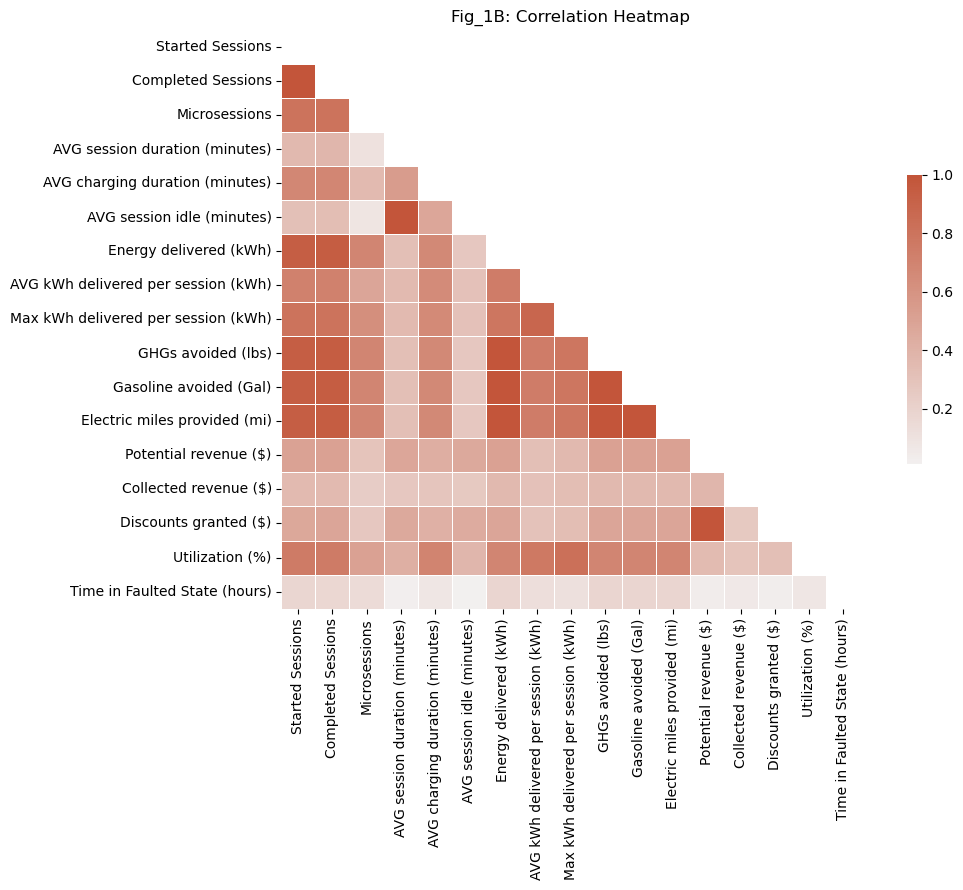

In [65]:
# Get correlations between the features 
df_reporting_corr = df_reporting.corr()
# print(df_reporting_corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_reporting_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_reporting_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Fig_1B: Correlation Heatmap')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/fig1B.jpg')

# Show the plot
plt.show()

In [66]:
# Top Correlations

# NOTE: I don't think this is useful as is but might be helpful if we want to filter down to some more useful correlations.

# Convert correlation matrix to a series for easier manipulation
corr_pairs = df_reporting_corr.unstack()

# Remove self-correlations (which are always 1)
corr_pairs = corr_pairs[corr_pairs < 1]

# Get absolute values for sorting (to include negative correlations)
corr_pairs_abs = corr_pairs.abs().sort_values(ascending=False)

# Get top 5 correlations (these will be the strongest positive and negative)
top_5_correlations = corr_pairs_abs.head(5)

# Display the results with their actual correlation values (not absolute)
for idx, (pair, _) in enumerate(top_5_correlations.items(), 1):
    feature1, feature2 = pair
    correlation = corr_pairs[pair]
    print(f"{idx}. {feature1} — {feature2}: {correlation:.4f}")

1. Energy delivered (kWh) — GHGs avoided (lbs): 1.0000
2. GHGs avoided (lbs) — Energy delivered (kWh): 1.0000
3. Gasoline avoided (Gal) — GHGs avoided (lbs): 1.0000
4. GHGs avoided (lbs) — Gasoline avoided (Gal): 1.0000
5. GHGs avoided (lbs) — Electric miles provided (mi): 1.0000


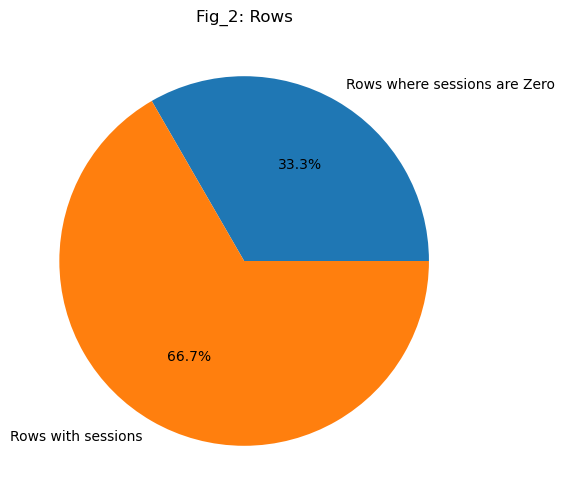

Rows where sessions are Zero 609. Rows with sessions 1218.


In [40]:
# Gets the number of started sessions = 0 and compared to non-zero values. Later in the timeline report we see this changes with time.
count_w_zero_sessions = len(df_reporting[df_reporting["Started Sessions"] == 0])
count_w_sessions = len(df_reporting[df_reporting["Started Sessions"] > 0])
data = [count_w_zero_sessions, count_w_sessions]
# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = plt.pie(data, labels=['Rows where sessions are Zero', 'Rows with sessions'],autopct='%1.1f%%')

# Customize the plot
plt.title('Fig_2: Rows')

# Save the plot
plt.savefig('images/fig2.jpg')

# Show the plot
plt.show()
print(f"Rows where sessions are Zero {count_w_zero_sessions}. Rows with sessions {count_w_sessions}.")


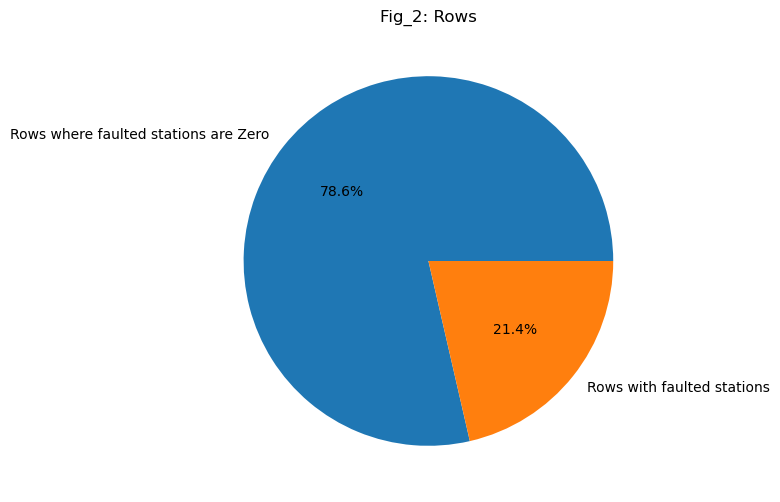

Rows where faulted stations are Zero 1436. Rows with faulted stations 391.


In [58]:
# Gets the mean of missing values in each column. Since True = 1 and False = 0 the mean tells us how much of the data is missing.
count_w_zero_faulted_stations = len(df_reporting[df_reporting["Faulted Stations"] == "-"])
count_w_faulted_stations = len(df_reporting[df_reporting["Faulted Stations"] != "-"])
data = [count_w_zero_faulted_stations, count_w_faulted_stations ]
# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = plt.pie(data, labels=['Rows where faulted stations are Zero', 'Rows with faulted stations'],autopct='%1.1f%%')

# Customize the plot
plt.title('Fig_2: Rows')

# Save the plot
# plt.savefig('images/fig2.jpg')

# Show the plot
plt.show()
print(f"Rows where faulted stations are Zero {count_w_zero_faulted_stations}. Rows with faulted stations {count_w_faulted_stations}.")

In [42]:
df_reporting["Started Sessions"].value_counts()

0      609
36      20
49      20
51      19
3       19
      ... 
130      1
142      1
150      1
143      1
133      1
Name: Started Sessions, Length: 149, dtype: int64

(array([764., 158., 228., 218., 163., 127.,  88.,  50.,  23.,   8.]),
 array([  0. ,  16.3,  32.6,  48.9,  65.2,  81.5,  97.8, 114.1, 130.4,
        146.7, 163. ]),
 <BarContainer object of 10 artists>)

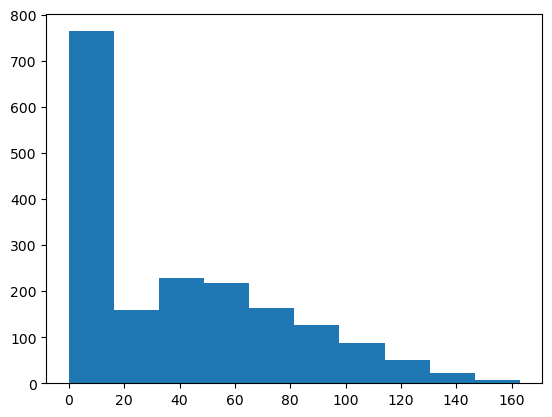

In [43]:
# Histogram plot of started sessions
plt.hist(df_reporting["Started Sessions"])

In [47]:
# Convert Dataframe to timeline
df_reporting_timeline = df_reporting.copy()
df_reporting_timeline['Day'] = pd.to_datetime(df_reporting_timeline['Day'])
df_reporting_timeline = df_reporting_timeline.set_index('Day')

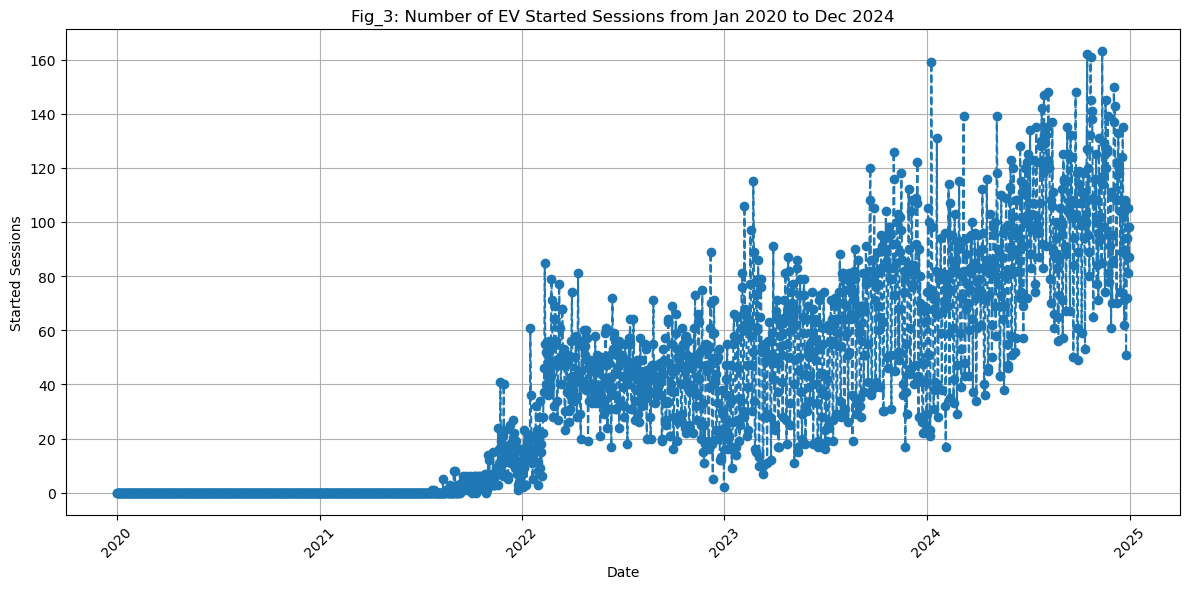

In [53]:
# Plot the timeline of started sessions
plt.figure(figsize=(12, 6))
plt.plot(df_reporting_timeline.index, df_reporting_timeline['Started Sessions'], '--o')
plt.title('Fig_3: Number of EV Started Sessions from Jan 2020 to Dec 2024')
plt.xlabel('Date')
plt.ylabel('Started Sessions')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig('images/fig3.jpg')
plt.show()

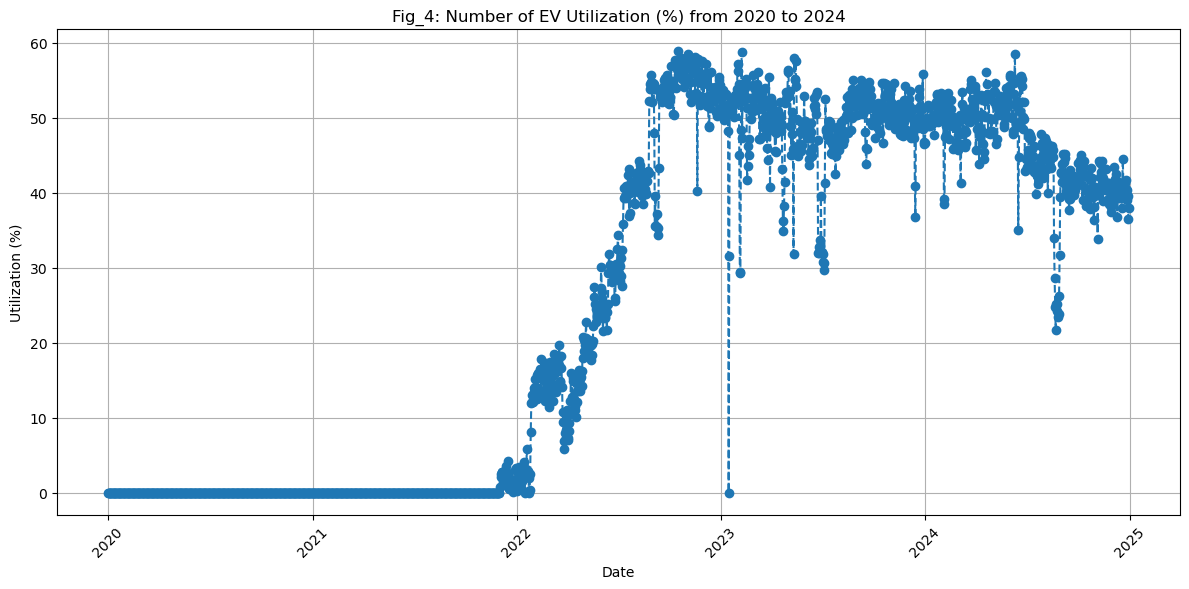

In [54]:
# Plot the timeline of started sessions
plt.figure(figsize=(12, 6))
plt.plot(df_reporting_timeline.index, df_reporting_timeline['Utilization (%)'], '--o')
plt.title('Fig_4: Number of EV Utilization (%) from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Utilization (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig('images/fig4.jpg')
plt.show()

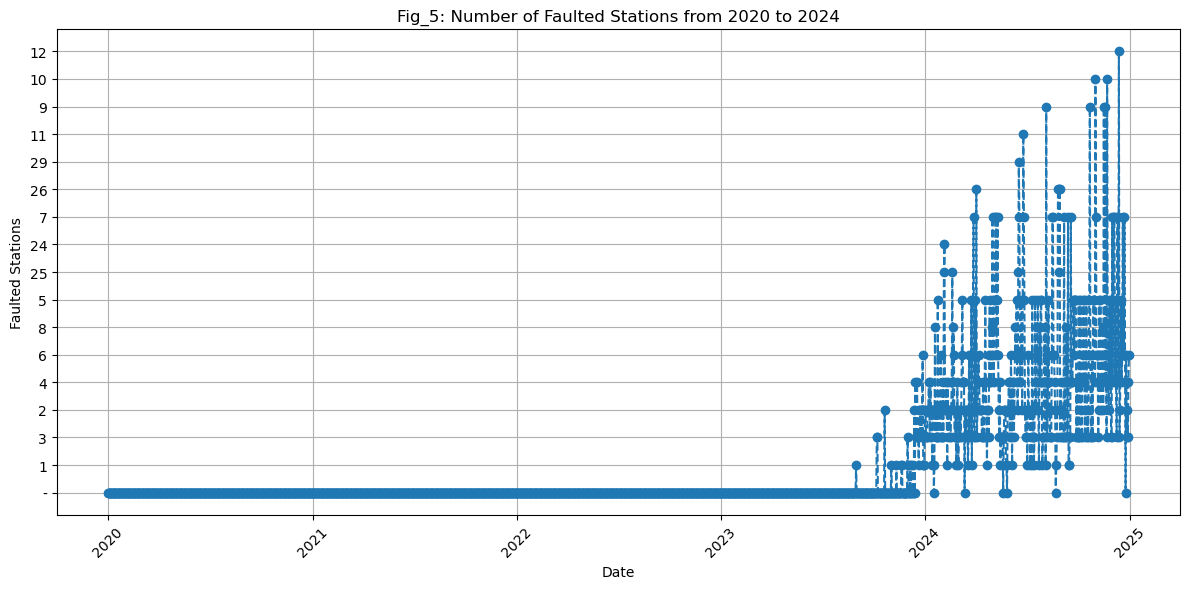

In [62]:
# Plot the timeline of started sessions
plt.figure(figsize=(12, 6))
plt.plot(df_reporting_timeline.index, df_reporting_timeline['Faulted Stations'], '--o')
plt.title('Fig_5: Number of Faulted Stations from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Faulted Stations')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig('images/fig5.jpg')
plt.show()